FOOD MART MEDIA CAMPAIGN COST

This is an analysis of the [Kaggle Convenient Food Mart dataset](https://www.kaggle.com/datasets/ramjasmaurya/medias-cost-prediction-in-foodmart).

[Convenient Food Mart (CFM)](https://en.wikipedia.org/wiki/Convenient_Food_Mart) is a chain of convenience stores in the United States and was the US' third-largest chain of convenience stores as of 1988. There are currently approximately 325 stores located in the US. Food Mart is headquartered Mentor, Ohio. Convenient Food Mart operates on the franchise system. The NASDAQ exchange dropped Convenient Food Mart the same year when the company failed to meet financial reporting requirements. Carden & Cherry advertised Convenient Food Mart with the Ernest character in the 1980s. 

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [12]:
isPandas = False
if isPandas:
    import zipfile
    archive = zipfile.ZipFile('E:/_2022 Datasets/Cost Prediction/costprediction.zip', 'r')
    cost    = archive.read('media prediction and its cost.csv')
else:
    cost = pd.read_csv('E:/_2022 Datasets/Cost Prediction/costprediction.zip')

cost.head()    

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,total_children,education,member_card,occupation,houseowner,avg_cars_at home(approx),avg. yearly_income,num_children_at_home,avg_cars_at home(approx).1,brand_name,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,store_type,store_city,store_state,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,M,F,1.0,Partial High School,Normal,Skilled Manual,Y,1.0,$10K - $30K,1.0,1.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,USA,M,M,0.0,Bachelors Degree,Silver,Professional,Y,4.0,$50K - $70K,0.0,4.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86
2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2.0,High Roller Savings,USA,S,F,4.0,Partial High School,Normal,Manual,N,1.0,$10K - $30K,0.0,1.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16
3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2.0,Cash Register Lottery,USA,M,F,2.0,High School Degree,Bronze,Manual,Y,2.0,$30K - $50K,2.0,2.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,In-Store Coupon,95.78
4,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3.0,Double Down Sale,USA,M,M,0.0,Partial High School,Bronze,Skilled Manual,N,2.0,$30K - $50K,0.0,2.0,Golden,1.36,7.12,5.11,0.0,1.0,29.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79


In [3]:
cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   food_category               60428 non-null  object 
 1   food_department             60428 non-null  object 
 2   food_family                 60428 non-null  object 
 3   store_sales(in millions)    60428 non-null  float64
 4   store_cost(in millions)     60428 non-null  float64
 5   unit_sales(in millions)     60428 non-null  float64
 6   promotion_name              60428 non-null  object 
 7   sales_country               60428 non-null  object 
 8   marital_status              60428 non-null  object 
 9   gender                      60428 non-null  object 
 10  total_children              60428 non-null  float64
 11  education                   60428 non-null  object 
 12  member_card                 60428 non-null  object 
 13  occupation                  604

In [3]:
cost.nunique()

food_category                   45
food_department                 22
food_family                      3
store_sales(in millions)      1033
store_cost(in millions)       9919
unit_sales(in millions)          6
promotion_name                  49
sales_country                    3
marital_status                   2
gender                           2
total_children                   6
education                        5
member_card                      4
occupation                       5
houseowner                       2
avg_cars_at home(approx)         5
avg. yearly_income               8
num_children_at_home             6
avg_cars_at home(approx).1       5
brand_name                     111
SRP                            315
gross_weight                   376
net_weight                     332
recyclable_package               2
low_fat                          2
units_per_case                  36
store_type                       5
store_city                      19
store_state         

In [4]:
cost.columns

Index(['food_category', 'food_department', 'food_family',
       'store_sales(in millions)', 'store_cost(in millions)',
       'unit_sales(in millions)', 'promotion_name', 'sales_country',
       'marital_status', 'gender', 'total_children', 'education',
       'member_card', 'occupation', 'houseowner', 'avg_cars_at home(approx)',
       'avg. yearly_income', 'num_children_at_home',
       'avg_cars_at home(approx).1', 'brand_name', 'SRP', 'gross_weight',
       'net_weight', 'recyclable_package', 'low_fat', 'units_per_case',
       'store_type', 'store_city', 'store_state', 'store_sqft', 'grocery_sqft',
       'frozen_sqft', 'meat_sqft', 'coffee_bar', 'video_store', 'salad_bar',
       'prepared_food', 'florist', 'media_type', 'cost'],
      dtype='object')

## CATEGORICAL VARIABLES

In [5]:
for col in cost.columns:
    if cost[col].dtypes == 'object':
        print('COLUMN NAME: ', col)
        print(cost[col].value_counts(dropna=False),'\n')
    elif cost[col].dtypes in ['float64', 'int64']:
        print('COLUMN NAME: ', col)
        print(cost[col].describe(include='all'),'\n')

COLUMN NAME:  food_category
Vegetables              7440
Snack Foods             6919
Dairy                   3835
Meat                    3107
Fruit                   3080
Jams and Jellies        2550
Baking Goods            1947
Breakfast Foods         1946
Bread                   1797
Canned Soup             1722
Beer and Wine           1590
Paper Products          1568
Bathroom Products       1552
Electrical              1544
Candy                   1538
Frozen Desserts         1446
Specialty               1174
Starchy Foods           1103
Magazines                971
Kitchen Products         969
Eggs                     952
Hot Beverages            891
Hygiene                  831
Pain Relievers           828
Pizza                    821
Carbonated Beverages     782
Pure Juice Beverages     760
Cleaning Supplies        748
Side Dishes              601
Frozen Entrees           595
Drinks                   581
Plastic Products         578
Hardware                 575
Cold Remedies  

## Cost By Media Type


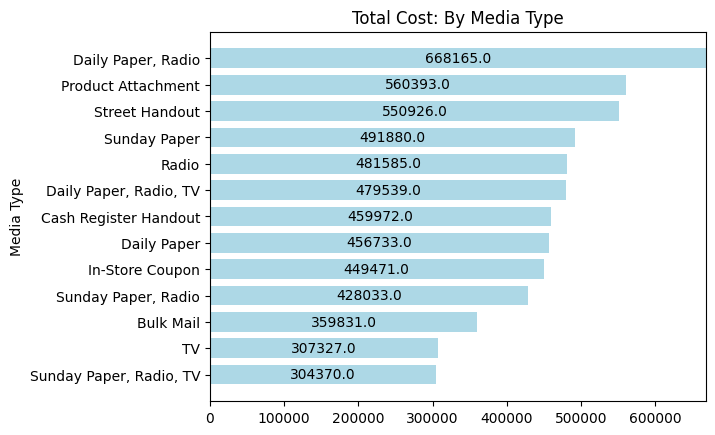

In [74]:
x = cost.groupby(['media_type'])['cost'].sum().sort_values(ascending=True).index
y = cost.groupby(['media_type'])['cost'].sum().sort_values(ascending=True).values

#Sums = cost.groupby(['media_type'])['cost'].sum().sort_values(ascending=True).values
#Sums = np.round_(Sums)

fig, ax = plt.subplots()
width = 0.75 # the width of the bars
ind = np.arange(len(y))  # the x locations for the groups

# I changed this line
p1 = ax.barh(ind,y, width, color="lightblue", align='edge')
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
ax.bar_label(p1, y, label_type='center')
plt.margins(0,0.05)
plt.title('Total Cost: By Media Type')
plt.ylabel('Media Type')
plt.show()

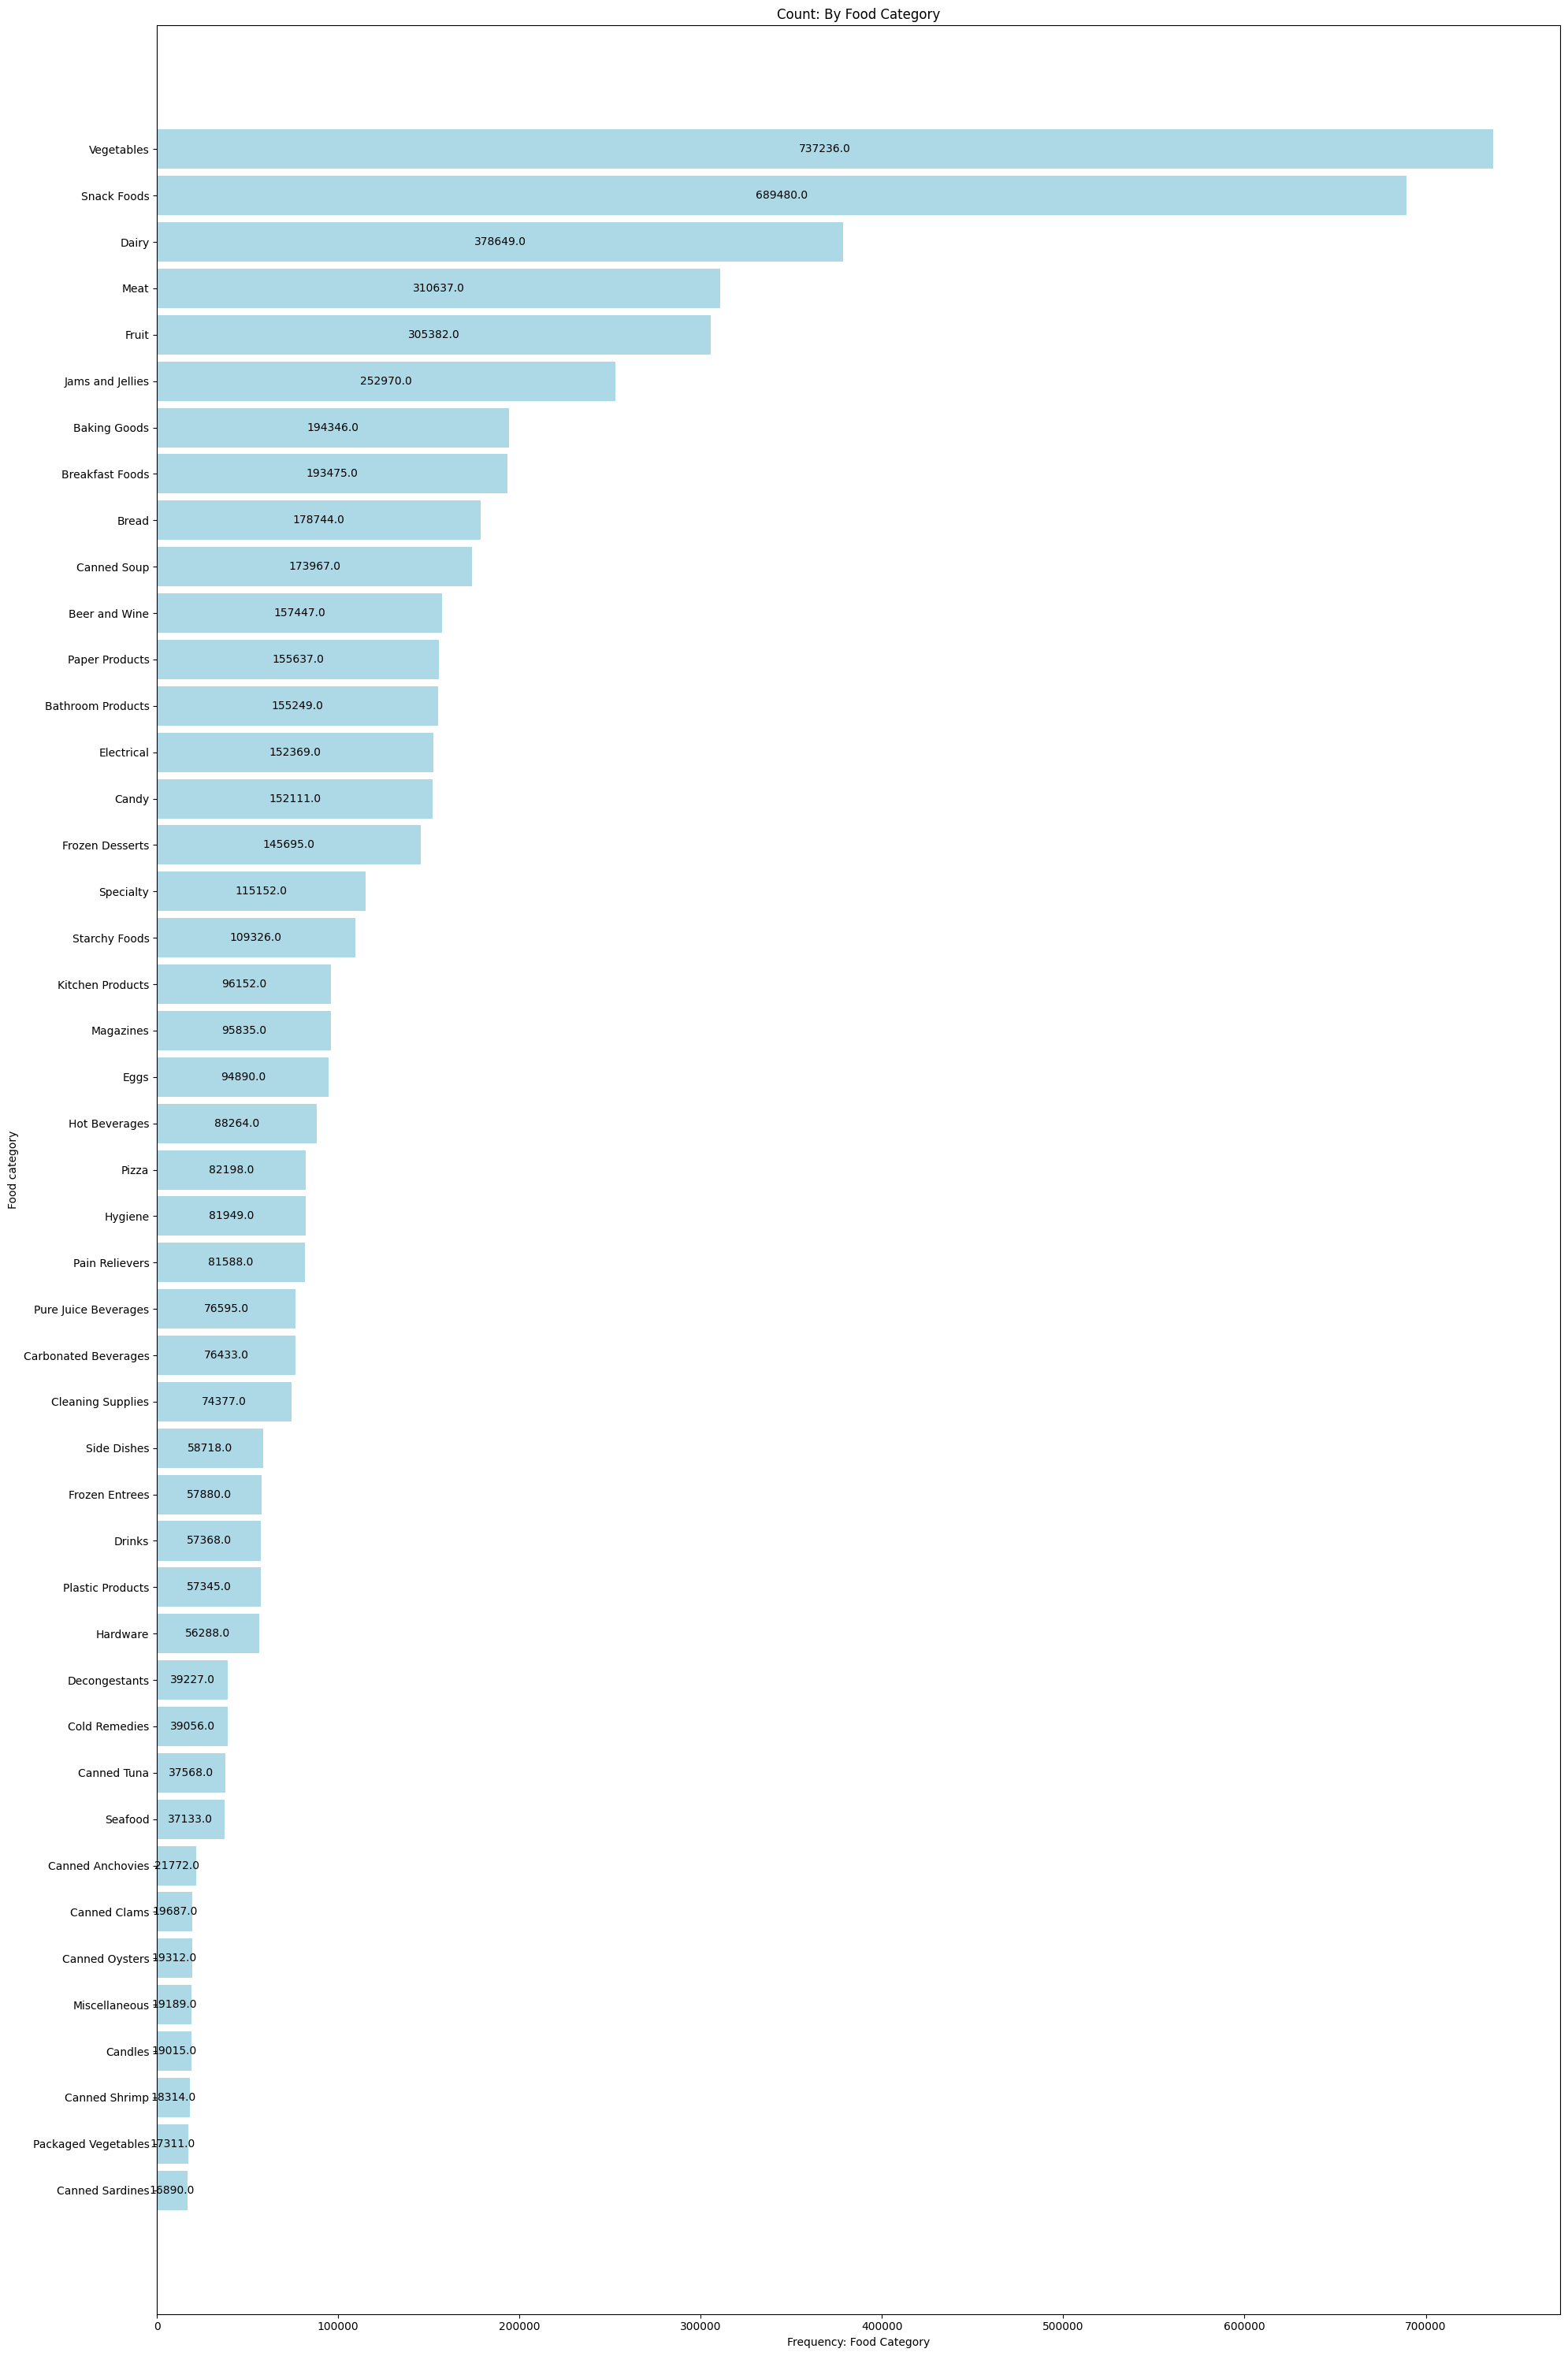

In [75]:
x = cost.groupby(['food_category'])['cost'].sum().sort_values(ascending=True).index
y = cost.groupby(['food_category'])['cost'].sum().sort_values(ascending=True).values
y = np.round(y, 0)
 
# Plot attributes
width = 0.85
ind = np.arange(len(y))

# Plots
fig, ax = plt.subplots(figsize=(20.0, 30.0))
pl = plt.barh(x, y, width, color='lightblue')
#plt.margins(0, 0.5)
ax.bar_label(pl, y, label_type='center') 
plt.xlabel('Frequency: Food Category')
plt.ylabel('Food category')
plt.title('Count: By Food Category')
plt.tight_layout();

In [33]:
cost.groupby(['food_category'])['cost'].sum().sort_values(ascending=True)

food_category
Canned Sardines          16890.20
Packaged Vegetables      17310.72
Canned Shrimp            18314.27
Candles                  19014.79
Miscellaneous            19189.46
Canned Oysters           19312.38
Canned Clams             19686.82
Canned Anchovies         21771.57
Seafood                  37133.39
Canned Tuna              37567.50
Cold Remedies            39056.41
Decongestants            39227.39
Hardware                 56288.04
Plastic Products         57345.04
Drinks                   57368.03
Frozen Entrees           57880.07
Side Dishes              58718.19
Cleaning Supplies        74376.86
Carbonated Beverages     76432.95
Pure Juice Beverages     76595.28
Pain Relievers           81587.54
Hygiene                  81949.34
Pizza                    82197.99
Hot Beverages            88264.09
Eggs                     94889.71
Magazines                95835.24
Kitchen Products         96151.81
Starchy Foods           109325.57
Specialty               115151.96


<AxesSubplot:xlabel='food_category'>

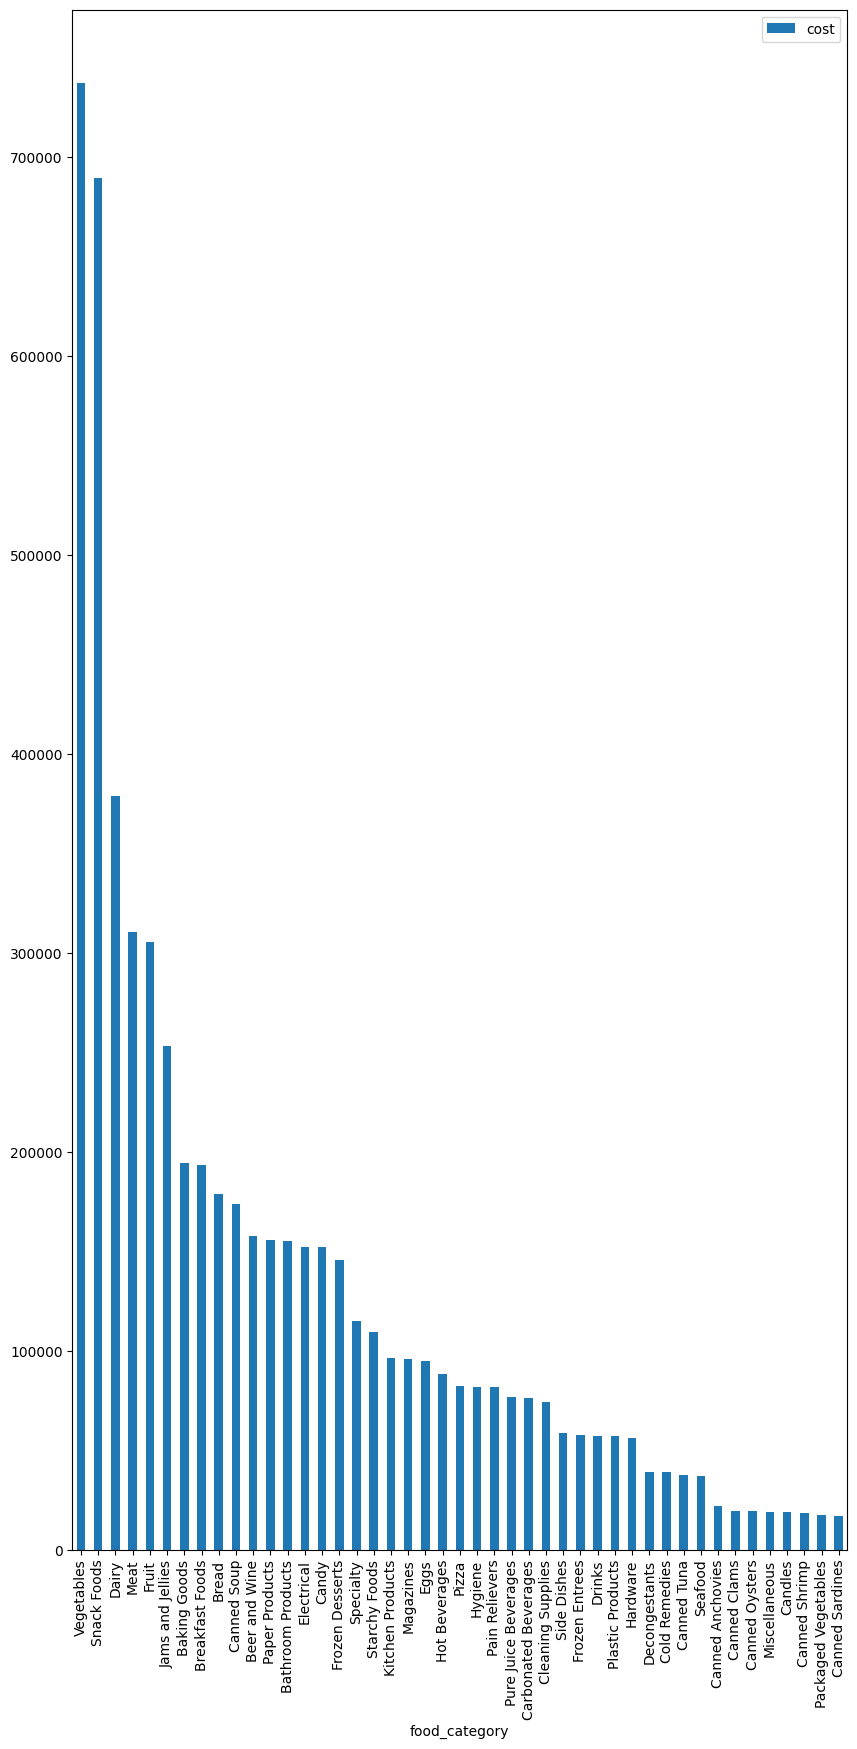

In [74]:
# Plot : Bar plot of total costs by food category
#pd.DataFrame(cost.groupby(['food_category'])['cost'].sum().sort_values(ascending=False)).plot(kind='bar')

In [80]:
# Examine all the money columns (in millions)
money_cols = ['store_sales(in millions)', 'store_cost(in millions)', 'unit_sales(in millions)']
money_df = cost[money_cols]
money_df.describe()

,store_sales(in millions),store_cost(in millions),unit_sales(in millions)
count,60428.000000,60428.000000,60428.000000
mean,6.541031,2.619460,3.093169
std,3.463047,1.453009,0.827677
min,0.510000,0.163200,1.000000
25%,3.810000,1.500000,3.000000
50%,5.940000,2.385600,3.000000
75%,8.670000,3.484025,4.000000
max,22.920000,9.726500,6.000000


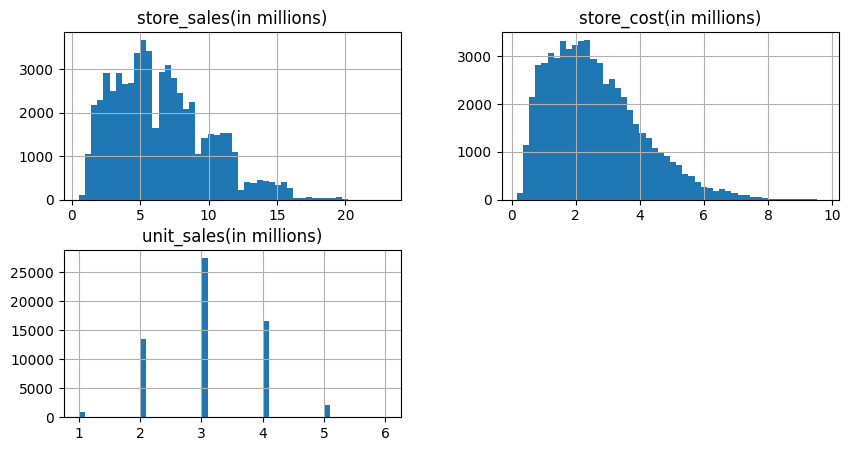

In [83]:
money_df.hist(bins=50, figsize=(10, 5));

## WHO ARE THE PEOPLE

In [88]:
cost.columns
people_cols = ['marital_status', 'gender', 'total_children', 'education',
       'member_card', 'occupation', 'houseowner', 'avg_cars_at home(approx)',
       'avg. yearly_income', 'num_children_at_home',
       'avg_cars_at home(approx).1']

people_df = cost[people_cols]      

In [90]:
people_df.groupby(['gender'])['marital_status'].value_counts(dropna=False)

gender  marital_status
F       M                 15760
        S                 15182
M       S                 15173
        M                 14313
Name: marital_status, dtype: int64